# CALFIRE Shapefiles Exploratory Data Analysis

This notebook performs exploratory data analysis on two CALFIRE datasets:
- **Post1980SHP**: Original California fire perimeters post-1980
- **Post1980-LassoSHP**: LASSO'd California fire perimeters post-1980 (A picture of the lasso'd area is included in the folder)

## What are SHP Files?
SHP files (Shapefiles) are a widely used geospatial vector data format, especially in Geographic Information System (GIS) applications. They're like CSVs, but with an additional capacity to collect and operate with polygon geometry. This allows for spatial operations like buffering, intersections, and spatial joins which are not possible with traditional, tabular CSVs.

## Analysis Goals:
1. Compare fire causes between the two datasets
2. Analyze GIS-calculated acres burned by month and year
3. Identify patterns in fire ignition causes and temporal trends

## Data Sources:
- `data/CALFIRE_PERIMETERS/Post1980-LassoSHP/` - LASSO processed data
- `data/CALFIRE_PERIMETERS/Post1980SHP/` - Original data


In [11]:
# Import required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure plot settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")


Libraries imported successfully!


In [12]:
import os
# Load the shapefiles
print("Loading CALFIRE shapefile datasets...")

# Load LASSO processed data
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
lasso_path = os.path.join(project_root, "data", "raw", "CALFIRE_PERIMETERS", "Post1980-LassoSHP", "California_Fire_Perimeters_(all).shp")
lasso_data = gpd.read_file(lasso_path)

# Load original data
original_path = os.path.join(project_root, "data", "raw", "CALFIRE_PERIMETERS", "Post1980SHP", "California_Fire_Perimeters_(all).shp")
original_data = gpd.read_file(original_path)

print(f"LASSO dataset loaded: {len(lasso_data)} records")
print(f"Original dataset loaded: {len(original_data)} records")

# Display basic info about the datasets
print("\n" + "="*50)
print("LASSO DATASET INFO:")
print("="*50)
print(f"Shape: {lasso_data.shape}")
print(f"Columns: {list(lasso_data.columns)}")

print("\n" + "="*50)
print("ORIGINAL DATASET INFO:")
print("="*50)
print(f"Shape: {original_data.shape}")
print(f"Columns: {list(original_data.columns)}")


Loading CALFIRE shapefile datasets...
LASSO dataset loaded: 585 records
Original dataset loaded: 11674 records

LASSO DATASET INFO:
Shape: (585, 19)
Columns: ['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE', 'GIS_ACRES', 'COMMENTS', 'COMPLEX_NA', 'IRWINID', 'FIRE_NUM', 'COMPLEX_ID', 'DECADES', 'geometry']

ORIGINAL DATASET INFO:
Shape: (11674, 19)
Columns: ['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'C_METHOD', 'OBJECTIVE', 'GIS_ACRES', 'COMMENTS', 'COMPLEX_NA', 'IRWINID', 'FIRE_NUM', 'COMPLEX_ID', 'DECADES', 'geometry']


In [13]:
# Examine the first few rows of each dataset
print("LASSO DATASET - First 5 rows:")
print("="*50)
display(lasso_data.head())

print("\nORIGINAL DATASET - First 5 rows:")
print("="*50)
display(original_data.head())

# Check for missing values
print("\nMISSING VALUES ANALYSIS:")
print("="*50)
print("LASSO Dataset:")
print(lasso_data.isnull().sum())

print("\nOriginal Dataset:")
print(original_data.isnull().sum())


LASSO DATASET - First 5 rows:


,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2017,CA,CCO,ORC,MAGAZINE,17083469,2017-07-31,2017-07-31,14,1,1,5.23979,None,None,None,None,None,2010-2019,"POLYGON ((-13101485.556 3985895.062, -13101474..."
1,2023,CA,CDF,RRU,ROCK,00116806,2023-08-09,2023-08-10,14,1,1,531.02200,None,None,{CC12CC5A-906C-47FD-9F49-4F0BC4638BEF},None,None,2020-January 2025,"POLYGON ((-13039416 4013719, -13039242 4013815..."
2,2016,CA,CDF,MVU,PALA 3,012832,2016-05-31,2016-07-02,14,1,1,66.19800,Pala_3,None,{7B928689-A761-425C-8425-E845FB5373C8},None,None,2010-2019,"POLYGON ((-13034562.674 3950768.16, -13034562...."
3,1995,CA,CDF,RRU,WATER,00030992,1995-06-29,1899-12-30,2,0,1,337.10000,None,None,None,00000832,None,1990-1999,"POLYGON ((-13068584.963 4008102.517, -13068550..."
4,2003,CA,USF,BDF,OLD,00000000,2003-10-25,2003-11-15,7,8,1,91428.00000,None,None,None,00000147,None,2000-2009,"POLYGON ((-13063036.164 4077456.925, -13062911..."



ORIGINAL DATASET - First 5 rows:


,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,C_METHOD,OBJECTIVE,GIS_ACRES,COMMENTS,COMPLEX_NA,IRWINID,FIRE_NUM,COMPLEX_ID,DECADES,geometry
0,2025,CA,CDF,LDF,PALISADES,00000738,2025-01-07,2025-01-31,14,7,1,23448.900,None,None,{A7EA5D21-F882-44B8-BF64-44AB11059DC1},None,None,2020-January 2025,"MULTIPOLYGON (((-13193558.265 4032826.468, -13..."
1,2025,CA,CDF,LAC,EATON,00009087,2025-01-08,2025-01-31,14,7,1,14056.300,None,None,{72660ADC-B5EF-4D96-A33F-B4EA3740A4E3},None,None,2020-January 2025,"MULTIPOLYGON (((-13146936.686 4051222.067, -13..."
2,2025,CA,CCO,VNC,KENNETH,00003155,2025-01-09,2025-02-04,14,2,1,998.738,from OES Intel 24,None,{842FB37B-7AC8-4700-BB9C-028BF753D149},None,None,2020-January 2025,"POLYGON ((-13211054.577 4051508.758, -13211051..."
3,2025,CA,CDF,LDF,HURST,00003294,2025-01-07,2025-01-09,14,7,1,831.385,None,None,{F4E810AD-CDF3-4ED4-B63F-03D43785BA7B},None,None,2020-January 2025,"POLYGON ((-13187991.688 4073306.403, -13187979..."
4,2025,CA,CDF,LAC,LIDIA,00010648,2025-01-08,2025-01-11,14,7,1,347.704,None,None,{E451AEAE-4177-4B78-BDE8-1E27B9D5D56C},None,None,2020-January 2025,"POLYGON ((-13164156.207 4087252.805, -13164139..."



MISSING VALUES ANALYSIS:
LASSO Dataset:
YEAR_           0
STATE           0
AGENCY          0
UNIT_ID         0
FIRE_NAME      45
INC_NUM        16
ALARM_DATE      0
CONT_DATE       0
CAUSE           0
C_METHOD        0
OBJECTIVE       0
GIS_ACRES       0
COMMENTS      516
COMPLEX_NA    581
IRWINID       477
FIRE_NUM      237
COMPLEX_ID    581
DECADES         0
geometry        0
dtype: int64

Original Dataset:
YEAR_             0
STATE             0
AGENCY            1
UNIT_ID          12
FIRE_NAME       580
INC_NUM         418
ALARM_DATE        0
CONT_DATE         0
CAUSE             0
C_METHOD          0
OBJECTIVE         0
GIS_ACRES         0
COMMENTS       9710
COMPLEX_NA    11082
IRWINID        8538
FIRE_NUM       5415
COMPLEX_ID    11112
DECADES           0
geometry          0
dtype: int64


## Data Preprocessing

Before analysis, we need to:
1. Identify relevant columns for fire causes and GIS-calculated acres
2. Parse date information for temporal analysis
3. Clean and standardize the data


In [14]:
# Function to identify key columns
def identify_key_columns(df, dataset_name):
    """Identify columns related to fire causes, acres, and dates"""
    print(f"\n{dataset_name} - Column Analysis:")
    print("="*50)
    
    # Look for cause-related columns
    cause_cols = [col for col in df.columns if any(keyword in col.lower() 
                  for keyword in ['cause', 'ignition', 'origin'])]
    print(f"Potential cause columns: {cause_cols}")
    
    # Look for acreage columns
    acre_cols = [col for col in df.columns if any(keyword in col.lower() 
                 for keyword in ['acre', 'area', 'gis'])]
    print(f"Potential acreage columns: {acre_cols}")
    
    # Look for date columns
    date_cols = [col for col in df.columns if any(keyword in col.lower() 
                 for keyword in ['date', 'alarm', 'start', 'year', 'month'])]
    print(f"Potential date columns: {date_cols}")
    
    return cause_cols, acre_cols, date_cols

# Analyze both datasets
lasso_cause, lasso_acre, lasso_date = identify_key_columns(lasso_data, "LASSO")
orig_cause, orig_acre, orig_date = identify_key_columns(original_data, "ORIGINAL")



LASSO - Column Analysis:
Potential cause columns: ['CAUSE']
Potential acreage columns: ['GIS_ACRES']
Potential date columns: ['YEAR_', 'ALARM_DATE', 'CONT_DATE']

ORIGINAL - Column Analysis:
Potential cause columns: ['CAUSE']
Potential acreage columns: ['GIS_ACRES']
Potential date columns: ['YEAR_', 'ALARM_DATE', 'CONT_DATE']


In [15]:
# Examine acreage and date columns
def examine_numeric_columns(df, cols, dataset_name, col_type):
    """Examine numeric columns (acres) and date columns"""
    print(f"\n{dataset_name} - {col_type.title()} Column Analysis:")
    print("="*50)
    
    for col in cols:
        if col in df.columns:
            print(f"\n{col}:")
            print(f"Data type: {df[col].dtype}")
            print(f"Non-null values: {df[col].count()}")
            if df[col].dtype in ['int64', 'float64']:
                print(f"Min: {df[col].min()}")
                print(f"Max: {df[col].max()}")
                print(f"Mean: {df[col].mean():.2f}")
            else:
                print("Sample values:")
                print(df[col].dropna().head().tolist())

# Examine acreage columns
if lasso_acre:
    examine_numeric_columns(lasso_data, lasso_acre, "LASSO", "acreage")
if orig_acre:
    examine_numeric_columns(original_data, orig_acre, "ORIGINAL", "acreage")

# Examine date columns
if lasso_date:
    examine_numeric_columns(lasso_data, lasso_date, "LASSO", "date")
if orig_date:
    examine_numeric_columns(original_data, orig_date, "ORIGINAL", "date")



LASSO - Acreage Column Analysis:

GIS_ACRES:
Data type: float64
Non-null values: 585
Min: 0.00135689
Max: 91428.0
Mean: 1432.66

ORIGINAL - Acreage Column Analysis:

GIS_ACRES:
Data type: float64
Non-null values: 11674
Min: 0.00117093
Max: 1032700.0
Mean: 2293.66

LASSO - Date Column Analysis:

YEAR_:
Data type: int32
Non-null values: 585
Sample values:
[2017, 2023, 2016, 1995, 2003]

ALARM_DATE:
Data type: datetime64[ms]
Non-null values: 585
Sample values:
[Timestamp('2017-07-31 00:00:00'), Timestamp('2023-08-09 00:00:00'), Timestamp('2016-05-31 00:00:00'), Timestamp('1995-06-29 00:00:00'), Timestamp('2003-10-25 00:00:00')]

CONT_DATE:
Data type: datetime64[ms]
Non-null values: 585
Sample values:
[Timestamp('2017-07-31 00:00:00'), Timestamp('2023-08-10 00:00:00'), Timestamp('2016-07-02 00:00:00'), Timestamp('1899-12-30 00:00:00'), Timestamp('2003-11-15 00:00:00')]

ORIGINAL - Date Column Analysis:

YEAR_:
Data type: int32
Non-null values: 11674
Sample values:
[2025, 2025, 2025, 2025,

## Fire Causes Analysis

Now let's analyze and compare the causes of fires between the two datasets.


In [16]:
# Create cause code mapping and use CAUSE column specifically
def get_cause_column_and_mapping():
    """Use CAUSE column and create mapping from codes to labels"""
    
    # Define the cause code mapping, from the CALFIRE dataset data dictionary
    cause_mapping = {
        1: 'Lightning',
        2: 'Equipment Use',
        3: 'Smoking',
        4: 'Campfire',
        5: 'Debris',
        6: 'Railroad',
        7: 'Arson',
        8: 'Playing with fire',
        9: 'Miscellaneous',
        10: 'Vehicle',
        11: 'Powerline',
        12: 'Firefighter Training',
        13: 'Non-Firefighter Training',
        14: 'Unknown/Unidentified',
        15: 'Structure',
        16: 'Aircraft',
        17: 'Volcanic',
        18: 'Escaped Prescribed Burn',
        19: 'Illegal Alien Campfire'
    }
    
    return 'CAUSE', cause_mapping

def prepare_cause_data(df, dataset_name, cause_col, cause_mapping):
    """Prepare cause data by converting numeric codes to text labels"""
    if cause_col not in df.columns:
        print(f"{dataset_name}: CAUSE column not found")
        return df.copy(), None
    
    # Create a copy of the dataframe
    df_copy = df.copy()
    
    # Convert cause codes to labels
    df_copy['CAUSE_TEXT'] = df_copy[cause_col].map(cause_mapping)
    
    # Handle any unmapped values
    unmapped_count = df_copy['CAUSE_TEXT'].isnull().sum()
    if unmapped_count > 0:
        print(f"{dataset_name}: {unmapped_count} records with unmapped cause codes")
        # Fill unmapped values with the original code for investigation
        df_copy['CAUSE_TEXT'] = df_copy['CAUSE_TEXT'].fillna('Code ' + df_copy[cause_col].astype(str))
    
    # Count valid cause records
    valid_count = df_copy[cause_col].count()
    total_count = len(df_copy)
    
    print(f"{dataset_name}: Using 'CAUSE' column")
    print(f"  - Valid cause records: {valid_count:,} ({valid_count/total_count*100:.1f}%)")
    print(f"  - Unique cause codes: {df_copy[cause_col].nunique()}")
    
    return df_copy, 'CAUSE_TEXT'

# Get cause column and mapping
cause_col, cause_mapping = get_cause_column_and_mapping()

# Prepare cause data for both datasets
lasso_data_processed, lasso_cause_col = prepare_cause_data(lasso_data, "LASSO", cause_col, cause_mapping)
orig_data_processed, orig_cause_col = prepare_cause_data(original_data, "ORIGINAL", cause_col, cause_mapping)

print(f"\nCause code mapping:")
for code, label in cause_mapping.items():
    print(f"  {code}: {label}")


LASSO: Using 'CAUSE' column
  - Valid cause records: 585 (100.0%)
  - Unique cause codes: 15
ORIGINAL: Using 'CAUSE' column
  - Valid cause records: 11,674 (100.0%)
  - Unique cause codes: 18

Cause code mapping:
  1: Lightning
  2: Equipment Use
  3: Smoking
  4: Campfire
  5: Debris
  6: Railroad
  7: Arson
  8: Playing with fire
  9: Miscellaneous
  10: Vehicle
  11: Powerline
  12: Firefighter Training
  13: Non-Firefighter Training
  14: Unknown/Unidentified
  15: Structure
  16: Aircraft
  17: Volcanic
  18: Escaped Prescribed Burn
  19: Illegal Alien Campfire


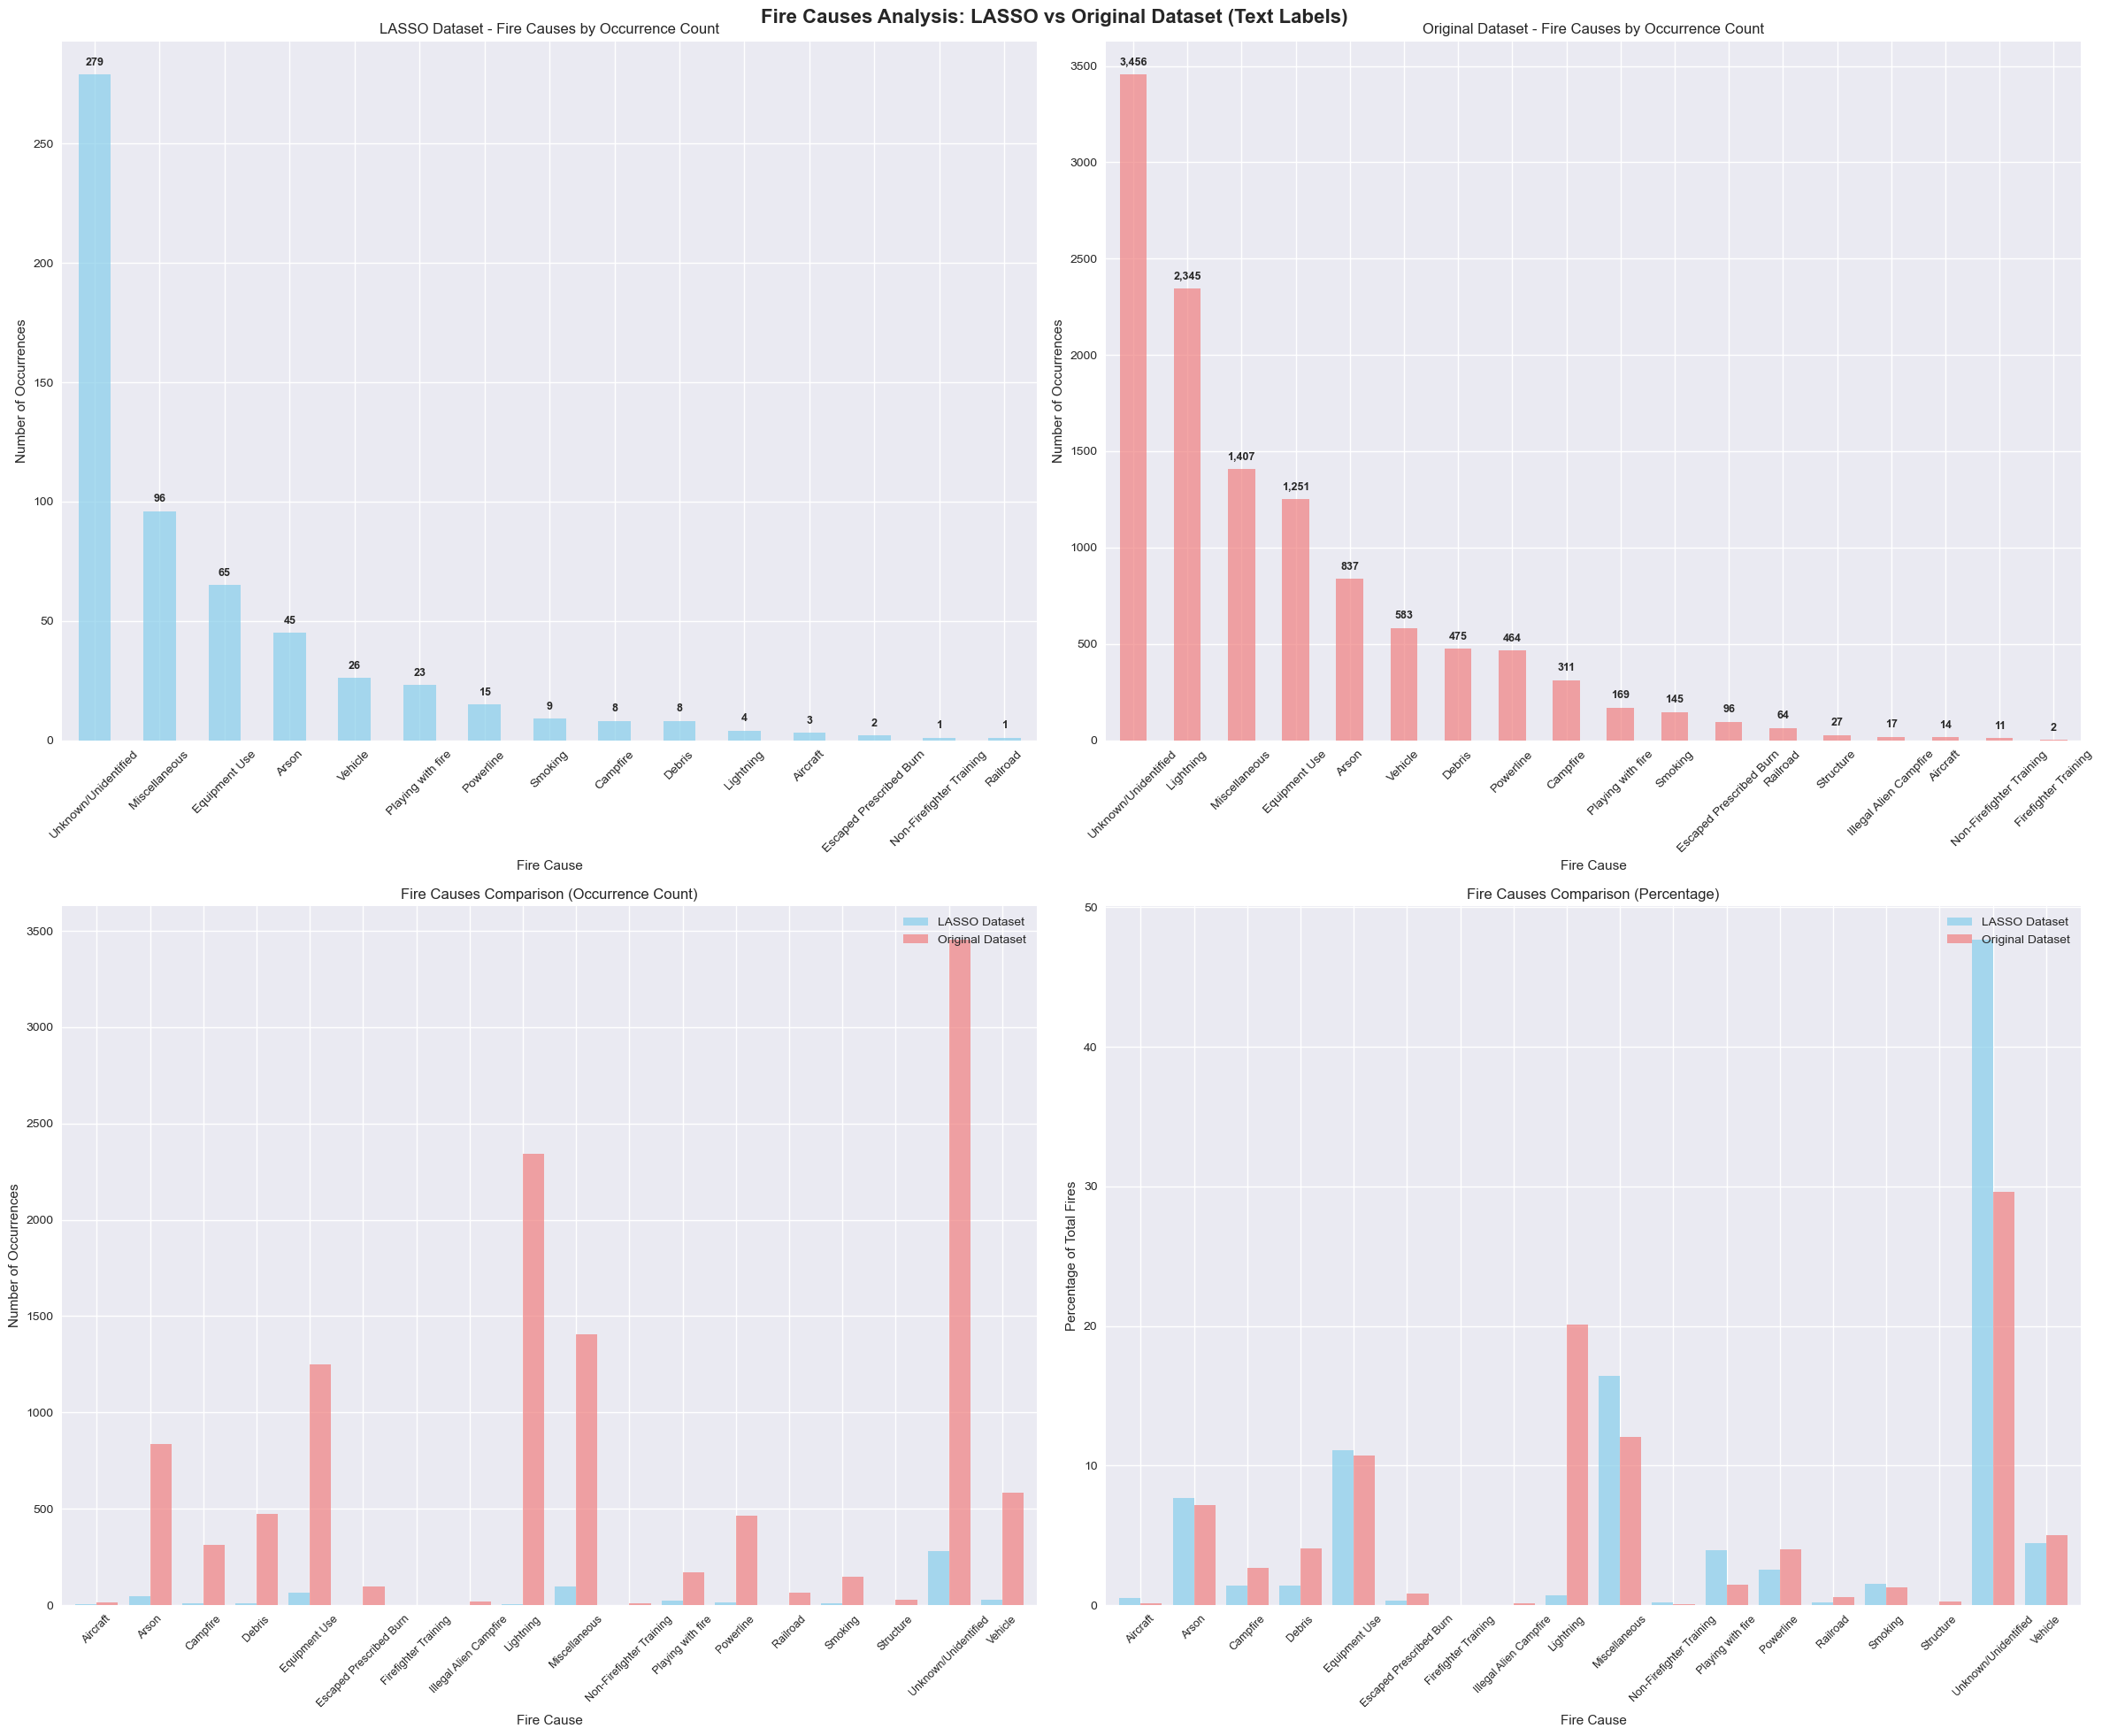

DETAILED FIRE CAUSES ANALYSIS

LASSO Dataset Summary:
Total fires: 585
Fires with cause data: 585
Unique causes: 15

Top 5 causes (most prominent):
  1. Unknown/Unidentified: 279 fires (47.7%)
  2. Miscellaneous: 96 fires (16.4%)
  3. Equipment Use: 65 fires (11.1%)
  4. Arson: 45 fires (7.7%)
  5. Vehicle: 26 fires (4.4%)

Bottom 5 causes (least prominent):
  1. Lightning: 4 fires (0.7%)
  2. Aircraft: 3 fires (0.5%)
  3. Escaped Prescribed Burn: 2 fires (0.3%)
  4. Non-Firefighter Training: 1 fires (0.2%)
  5. Railroad: 1 fires (0.2%)

Original Dataset Summary:
Total fires: 11,674
Fires with cause data: 11,674
Unique causes: 18

Top 5 causes (most prominent):
  1. Unknown/Unidentified: 3,456 fires (29.6%)
  2. Lightning: 2,345 fires (20.1%)
  3. Miscellaneous: 1,407 fires (12.1%)
  4. Equipment Use: 1,251 fires (10.7%)
  5. Arson: 837 fires (7.2%)

Bottom 5 causes (least prominent):
  1. Structure: 27 fires (0.2%)
  2. Illegal Alien Campfire: 17 fires (0.1%)
  3. Aircraft: 14 fires (

In [17]:
# Plot fire causes comparison with text labels
def plot_fire_causes_with_labels(df1, df2, cause_col1, cause_col2, dataset1_name, dataset2_name):
    """Create comparison plots for fire causes using text labels"""
    
    fig, axes = plt.subplots(2, 2, figsize=(24, 20))
    fig.suptitle('Fire Causes Analysis: LASSO vs Original Dataset (Text Labels)', fontsize=16, fontweight='bold')
    
    # Dataset 1 - Occurrence counts
    if cause_col1:
        cause_counts1 = df1[cause_col1].value_counts()
        ax1 = axes[0, 0]
        bars1 = cause_counts1.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
        ax1.set_title(f'{dataset1_name} - Fire Causes by Occurrence Count')
        ax1.set_xlabel('Fire Cause')
        ax1.set_ylabel('Number of Occurrences')
        ax1.tick_params(axis='x', rotation=45, labelsize=10)
        
        # Add value labels on bars
        for i, v in enumerate(cause_counts1.values):
            ax1.text(i, v + max(cause_counts1.values) * 0.01, f'{v:,}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Dataset 2 - Occurrence counts
    if cause_col2:
        cause_counts2 = df2[cause_col2].value_counts()
        ax2 = axes[0, 1]
        bars2 = cause_counts2.plot(kind='bar', ax=ax2, color='lightcoral', alpha=0.7)
        ax2.set_title(f'{dataset2_name} - Fire Causes by Occurrence Count')
        ax2.set_xlabel('Fire Cause')
        ax2.set_ylabel('Number of Occurrences')
        ax2.tick_params(axis='x', rotation=45, labelsize=10)
        
        # Add value labels on bars
        for i, v in enumerate(cause_counts2.values):
            ax2.text(i, v + max(cause_counts2.values) * 0.01, f'{v:,}', 
                    ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Side-by-side comparison of all causes
    if cause_col1 and cause_col2:
        # Get all unique causes from both datasets
        all_causes = sorted(set(cause_counts1.index) | set(cause_counts2.index))
        
        # Create a combined dataframe for comparison
        comparison_data = pd.DataFrame({
            dataset1_name: [cause_counts1.get(cause, 0) for cause in all_causes],
            dataset2_name: [cause_counts2.get(cause, 0) for cause in all_causes]
        }, index=all_causes)
        
        ax3 = axes[1, 0]
        comparison_data.plot(kind='bar', ax=ax3, width=0.8, color=['skyblue', 'lightcoral'], alpha=0.7)
        ax3.set_title('Fire Causes Comparison (Occurrence Count)')
        ax3.set_xlabel('Fire Cause')
        ax3.set_ylabel('Number of Occurrences')
        ax3.tick_params(axis='x', rotation=45, labelsize=9)
        ax3.legend(loc='upper right')
        
        # Percentage comparison
        ax4 = axes[1, 1]
        comparison_pct = comparison_data.div(comparison_data.sum()) * 100
        comparison_pct.plot(kind='bar', ax=ax4, width=0.8, color=['skyblue', 'lightcoral'], alpha=0.7)
        ax4.set_title('Fire Causes Comparison (Percentage)')
        ax4.set_xlabel('Fire Cause')
        ax4.set_ylabel('Percentage of Total Fires')
        ax4.tick_params(axis='x', rotation=45, labelsize=9)
        ax4.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed summary statistics
    print("="*80)
    print("DETAILED FIRE CAUSES ANALYSIS")
    print("="*80)
    
    if cause_col1:
        print(f"\n{dataset1_name} Summary:")
        print(f"Total fires: {len(df1):,}")
        print(f"Fires with cause data: {df1[cause_col1].count():,}")
        print(f"Unique causes: {df1[cause_col1].nunique()}")
        print(f"\nTop 5 causes (most prominent):")
        for i, (cause, count) in enumerate(cause_counts1.head(5).items(), 1):
            pct = count/df1[cause_col1].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
        
        print(f"\nBottom 5 causes (least prominent):")
        for i, (cause, count) in enumerate(cause_counts1.tail(5).items(), 1):
            pct = count/df1[cause_col1].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
    
    if cause_col2:
        print(f"\n{dataset2_name} Summary:")
        print(f"Total fires: {len(df2):,}")
        print(f"Fires with cause data: {df2[cause_col2].count():,}")
        print(f"Unique causes: {df2[cause_col2].nunique()}")
        print(f"\nTop 5 causes (most prominent):")
        for i, (cause, count) in enumerate(cause_counts2.head(5).items(), 1):
            pct = count/df2[cause_col2].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
        
        print(f"\nBottom 5 causes (least prominent):")
        for i, (cause, count) in enumerate(cause_counts2.tail(5).items(), 1):
            pct = count/df2[cause_col2].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")

# Create the improved fire causes comparison plot
plot_fire_causes_with_labels(lasso_data_processed, orig_data_processed, 
                            lasso_cause_col, orig_cause_col, 
                            "LASSO Dataset", "Original Dataset")


## Temporal Analysis: GIS-Calculated Acres by Month and Year

Now let's analyze the burned acreage patterns over time (by month and year).


In [18]:

# Prepare temporal data for analysis
def prepare_temporal_data(df, acre_col, date_col, dataset_name):
    """Prepare data for temporal analysis"""
    
    # Create a copy of the dataframe with required columns
    temp_df = df[[acre_col, date_col]].copy()
    temp_df = temp_df.dropna()
    
    # Convert date column to datetime
    try:
        temp_df[date_col] = pd.to_datetime(temp_df[date_col])
    except:
        print(f"Error converting {date_col} to datetime for {dataset_name}")
        return None
    
    # Extract year and month
    temp_df['Year'] = temp_df[date_col].dt.year
    temp_df['Month'] = temp_df[date_col].dt.month
    temp_df['Month_Name'] = temp_df[date_col].dt.month_name()
    
    # Rename acres column for consistency
    temp_df = temp_df.rename(columns={acre_col: 'Acres'})
    
    print(f"\n{dataset_name} temporal data prepared:")
    print(f"Records with valid date and acreage: {len(temp_df)}")
    print(f"Date range: {temp_df[date_col].min()} to {temp_df[date_col].max()}")
    print(f"Total acres: {temp_df['Acres'].sum():,.0f}")
    
    return temp_df

acre_col = 'GIS_ACRES'
date_col = 'ALARM_DATE'

# Prepare temporal data for both datasets
lasso_temporal = prepare_temporal_data(lasso_data, acre_col, date_col, "LASSO")
orig_temporal = prepare_temporal_data(original_data, acre_col, date_col, "ORIGINAL")




LASSO temporal data prepared:
Records with valid date and acreage: 585
Date range: 1980-03-18 00:00:00 to 2024-11-29 00:00:00
Total acres: 838,105

ORIGINAL temporal data prepared:
Records with valid date and acreage: 11674
Date range: 1980-12-10 00:00:00 to 2025-01-09 00:00:00
Total acres: 26,776,231


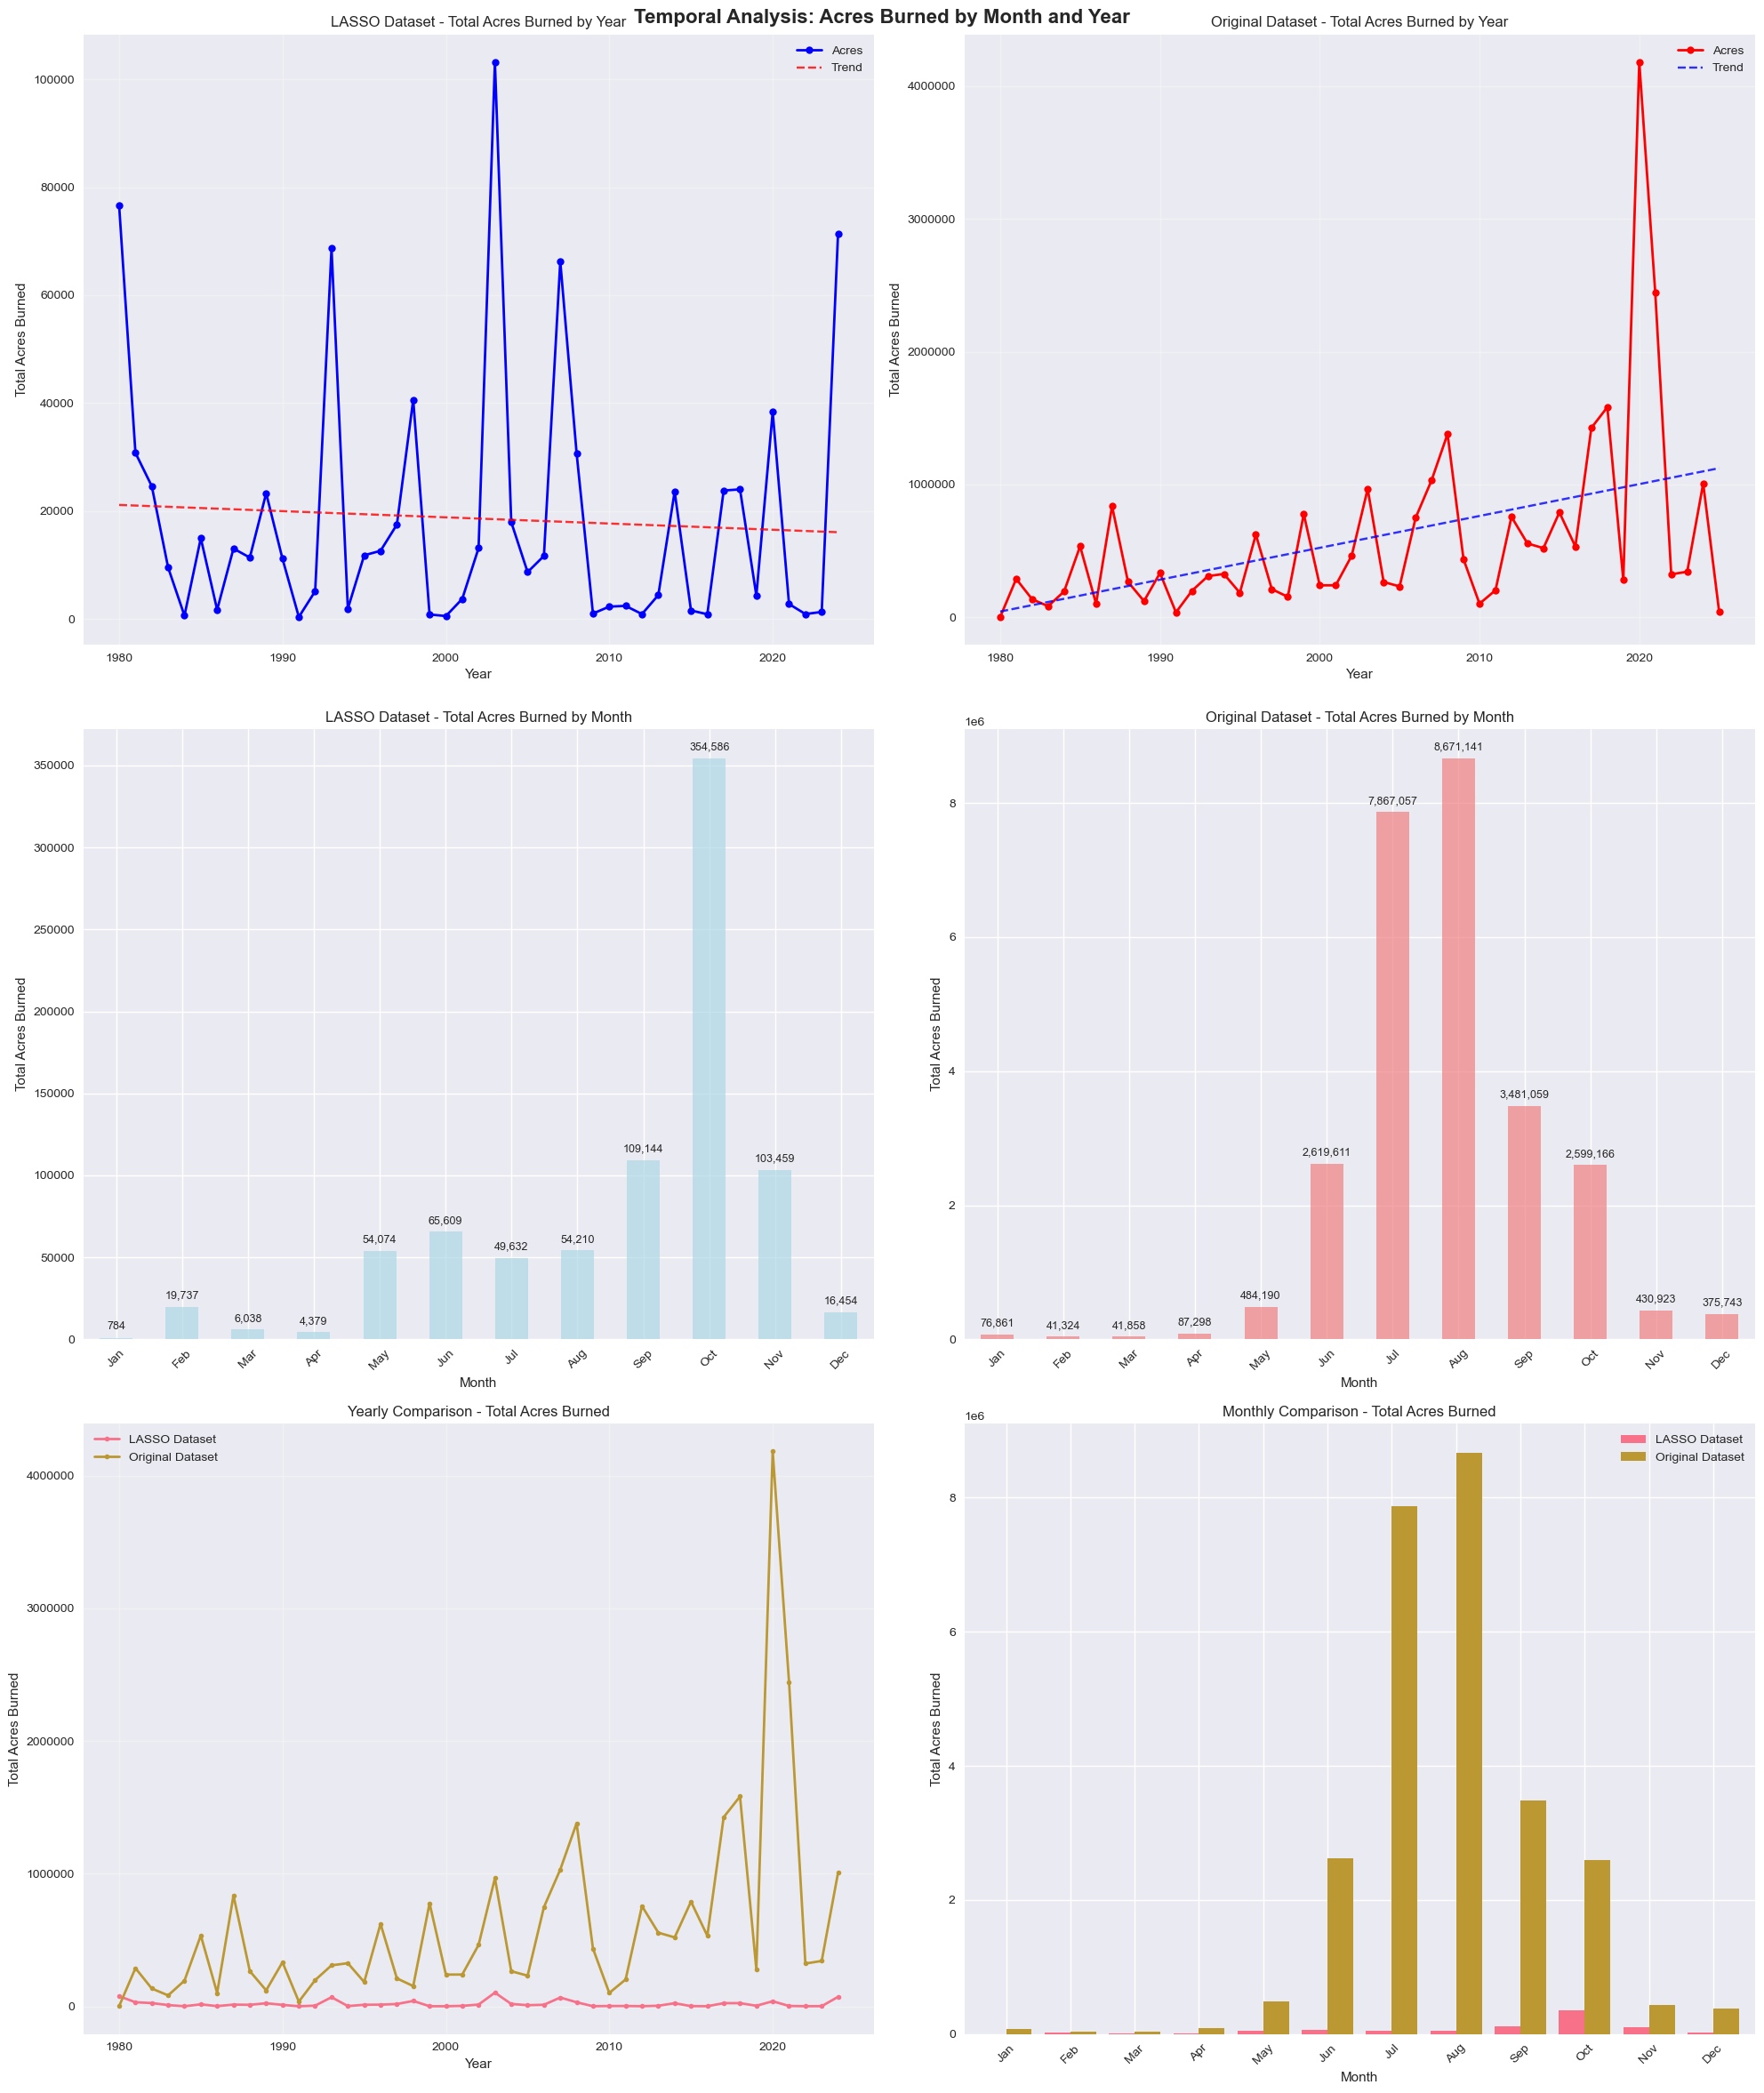


LASSO Dataset Temporal Summary:
Peak fire year: 2003 (103,182 acres)
Peak fire month: 10 (354,586 acres)
Average acres per year: 18,625
Average acres per month: 69,842

Original Dataset Temporal Summary:
Peak fire year: 2020 (4,182,232 acres)
Peak fire month: 8 (8,671,141 acres)
Average acres per year: 582,092
Average acres per month: 2,231,353


In [19]:
# Create comprehensive temporal analysis plots
def plot_temporal_analysis(df1, df2, dataset1_name, dataset2_name):
    """Create comprehensive temporal analysis plots"""
    
    fig, axes = plt.subplots(3, 2, figsize=(20, 24))
    fig.suptitle('Temporal Analysis: Acres Burned by Month and Year', fontsize=16, fontweight='bold')
    
    # Yearly analysis
    if df1 is not None:
        yearly_acres1 = df1.groupby('Year')['Acres'].sum()
        ax1 = axes[0, 0]
        yearly_acres1.plot(kind='line', ax=ax1, marker='o', linewidth=2, markersize=6, color='blue')
        ax1.set_title(f'{dataset1_name} - Total Acres Burned by Year')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Total Acres Burned')
        ax1.grid(True, alpha=0.3)
        ax1.ticklabel_format(style='plain', axis='y')
        
        # Add trend line
        x_vals = yearly_acres1.index
        y_vals = yearly_acres1.values
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        ax1.plot(x_vals, p(x_vals), "--", alpha=0.8, color='red', label='Trend')
        ax1.legend()
    
    if df2 is not None:
        yearly_acres2 = df2.groupby('Year')['Acres'].sum()
        ax2 = axes[0, 1]
        yearly_acres2.plot(kind='line', ax=ax2, marker='o', linewidth=2, markersize=6, color='red')
        ax2.set_title(f'{dataset2_name} - Total Acres Burned by Year')
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Total Acres Burned')
        ax2.grid(True, alpha=0.3)
        ax2.ticklabel_format(style='plain', axis='y')
        
        # Add trend line
        x_vals = yearly_acres2.index
        y_vals = yearly_acres2.values
        z = np.polyfit(x_vals, y_vals, 1)
        p = np.poly1d(z)
        ax2.plot(x_vals, p(x_vals), "--", alpha=0.8, color='blue', label='Trend')
        ax2.legend()
    
    # Monthly analysis
    if df1 is not None:
        monthly_acres1 = df1.groupby('Month')['Acres'].sum()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        ax3 = axes[1, 0]
        monthly_acres1.plot(kind='bar', ax=ax3, color='lightblue', alpha=0.7)
        ax3.set_title(f'{dataset1_name} - Total Acres Burned by Month')
        ax3.set_xlabel('Month')
        ax3.set_ylabel('Total Acres Burned')
        ax3.set_xticklabels(month_names, rotation=45)
        
        # Add value labels on bars
        for i, v in enumerate(monthly_acres1.values):
            ax3.text(i, v + max(monthly_acres1.values) * 0.01, f'{v:,.0f}', 
                    ha='center', va='bottom', fontsize=9)
    
    if df2 is not None:
        monthly_acres2 = df2.groupby('Month')['Acres'].sum()
        
        ax4 = axes[1, 1]
        monthly_acres2.plot(kind='bar', ax=ax4, color='lightcoral', alpha=0.7)
        ax4.set_title(f'{dataset2_name} - Total Acres Burned by Month')
        ax4.set_xlabel('Month')
        ax4.set_ylabel('Total Acres Burned')
        ax4.set_xticklabels(month_names, rotation=45)
        
        # Add value labels on bars
        for i, v in enumerate(monthly_acres2.values):
            ax4.text(i, v + max(monthly_acres2.values) * 0.01, f'{v:,.0f}', 
                    ha='center', va='bottom', fontsize=9)
    
    # Combined comparison - Year
    if df1 is not None and df2 is not None:
        # Get common year range
        min_year = max(yearly_acres1.index.min(), yearly_acres2.index.min())
        max_year = min(yearly_acres1.index.max(), yearly_acres2.index.max())
        
        common_years = range(min_year, max_year + 1)
        comparison_yearly = pd.DataFrame({
            dataset1_name: [yearly_acres1.get(year, 0) for year in common_years],
            dataset2_name: [yearly_acres2.get(year, 0) for year in common_years]
        }, index=common_years)
        
        ax5 = axes[2, 0]
        comparison_yearly.plot(kind='line', ax=ax5, marker='o', linewidth=2, markersize=4)
        ax5.set_title('Yearly Comparison - Total Acres Burned')
        ax5.set_xlabel('Year')
        ax5.set_ylabel('Total Acres Burned')
        ax5.grid(True, alpha=0.3)
        ax5.legend()
        ax5.ticklabel_format(style='plain', axis='y')
    
    # Combined comparison - Month
    if df1 is not None and df2 is not None:
        comparison_monthly = pd.DataFrame({
            dataset1_name: monthly_acres1,
            dataset2_name: monthly_acres2
        })
        
        ax6 = axes[2, 1]
        comparison_monthly.plot(kind='bar', ax=ax6, width=0.8)
        ax6.set_title('Monthly Comparison - Total Acres Burned')
        ax6.set_xlabel('Month')
        ax6.set_ylabel('Total Acres Burned')
        ax6.set_xticklabels(month_names, rotation=45)
        ax6.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    if df1 is not None:
        print(f"\n{dataset1_name} Temporal Summary:")
        print(f"Peak fire year: {yearly_acres1.idxmax()} ({yearly_acres1.max():,.0f} acres)")
        print(f"Peak fire month: {monthly_acres1.idxmax()} ({monthly_acres1.max():,.0f} acres)")
        print(f"Average acres per year: {yearly_acres1.mean():,.0f}")
        print(f"Average acres per month: {monthly_acres1.mean():,.0f}")
    
    if df2 is not None:
        print(f"\n{dataset2_name} Temporal Summary:")
        print(f"Peak fire year: {yearly_acres2.idxmax()} ({yearly_acres2.max():,.0f} acres)")
        print(f"Peak fire month: {monthly_acres2.idxmax()} ({monthly_acres2.max():,.0f} acres)")
        print(f"Average acres per year: {yearly_acres2.mean():,.0f}")
        print(f"Average acres per month: {monthly_acres2.mean():,.0f}")

# Create the temporal analysis plots
plot_temporal_analysis(lasso_temporal, orig_temporal, "LASSO Dataset", "Original Dataset")


## Interactive Visualizations

Let's create some interactive visualizations using Plotly for better exploration of the data.


In [20]:
# Interactive visualization of fire causes with text labels
def create_interactive_cause_viz_with_labels(df1, df2, cause_col1, cause_col2, dataset1_name, dataset2_name):
    """Create interactive fire cause visualization with text labels"""
    
    if not cause_col1 and not cause_col2:
        print("No cause data available for interactive visualization")
        return
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[f'{dataset1_name} - Fire Causes (Text Labels)', 
                       f'{dataset2_name} - Fire Causes (Text Labels)',
                       'Comparison - Count', 'Comparison - Percentage'],
        specs=[[{"type": "bar"}, {"type": "bar"}],
               [{"type": "bar"}, {"type": "bar"}]]
    )
    
    # Dataset 1 causes
    if cause_col1:
        cause_counts1 = df1[cause_col1].value_counts()
        fig.add_trace(
            go.Bar(x=cause_counts1.index, y=cause_counts1.values,
                   name=dataset1_name, marker_color='lightblue',
                   text=[f'{v:,}' for v in cause_counts1.values],
                   textposition='outside'),
            row=1, col=1
        )
    
    # Dataset 2 causes
    if cause_col2:
        cause_counts2 = df2[cause_col2].value_counts()
        fig.add_trace(
            go.Bar(x=cause_counts2.index, y=cause_counts2.values,
                   name=dataset2_name, marker_color='lightcoral',
                   text=[f'{v:,}' for v in cause_counts2.values],
                   textposition='outside'),
            row=1, col=2
        )
    
    # Comparison plots if both datasets have cause data
    if cause_col1 and cause_col2:
        # Get all unique causes from both datasets
        all_causes = sorted(set(cause_counts1.index) | set(cause_counts2.index))
        
        # Count comparison
        counts1 = [cause_counts1.get(cause, 0) for cause in all_causes]
        counts2 = [cause_counts2.get(cause, 0) for cause in all_causes]
        
        fig.add_trace(
            go.Bar(x=all_causes, y=counts1, name=f'{dataset1_name} (Count)', 
                   marker_color='lightblue', opacity=0.7,
                   text=[f'{v:,}' if v > 0 else '' for v in counts1],
                   textposition='outside'),
            row=2, col=1
        )
        fig.add_trace(
            go.Bar(x=all_causes, y=counts2, name=f'{dataset2_name} (Count)', 
                   marker_color='lightcoral', opacity=0.7,
                   text=[f'{v:,}' if v > 0 else '' for v in counts2],
                   textposition='outside'),
            row=2, col=1
        )
        
        # Percentage comparison
        total1 = df1[cause_col1].count()
        total2 = df2[cause_col2].count()
        pct1 = [(count/total1)*100 for count in counts1] if total1 > 0 else [0]*len(counts1)
        pct2 = [(count/total2)*100 for count in counts2] if total2 > 0 else [0]*len(counts2)
        
        fig.add_trace(
            go.Bar(x=all_causes, y=pct1, name=f'{dataset1_name} (%)', 
                   marker_color='lightblue', opacity=0.7,
                   text=[f'{v:.1f}%' if v > 0 else '' for v in pct1],
                   textposition='outside'),
            row=2, col=2
        )
        fig.add_trace(
            go.Bar(x=all_causes, y=pct2, name=f'{dataset2_name} (%)', 
                   marker_color='lightcoral', opacity=0.7,
                   text=[f'{v:.1f}%' if v > 0 else '' for v in pct2],
                   textposition='outside'),
            row=2, col=2
        )
    
    fig.update_layout(
        height=1000,
        title_text="Interactive Fire Causes Analysis (Text Labels)",
        showlegend=True
    )
    
    # Update x-axis labels with better formatting
    fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
    fig.update_yaxes(title_text="Number of Fires", row=1, col=1)
    fig.update_yaxes(title_text="Number of Fires", row=1, col=2)
    fig.update_yaxes(title_text="Number of Fires", row=2, col=1)
    fig.update_yaxes(title_text="Percentage of Total Fires", row=2, col=2)
    
    fig.show()

# Create enhanced interactive cause visualization
if lasso_cause_col or orig_cause_col:
    create_interactive_cause_viz_with_labels(lasso_data_processed, orig_data_processed, 
                                           lasso_cause_col, orig_cause_col,
                                           "LASSO Dataset", "Original Dataset")


In [21]:
# Interactive temporal visualization
def create_interactive_temporal_viz(df1, df2, dataset1_name, dataset2_name):
    """Create interactive temporal visualization"""
    
    if df1 is None and df2 is None:
        print("No temporal data available for interactive visualization")
        return
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=['Yearly Acres Burned', 'Monthly Acres Burned',
                       'Yearly Comparison', 'Monthly Comparison'],
        specs=[[{"type": "scatter"}, {"type": "bar"}],
               [{"type": "scatter"}, {"type": "bar"}]]
    )
    
    # Yearly data
    if df1 is not None:
        yearly_acres1 = df1.groupby('Year')['Acres'].sum()
        fig.add_trace(
            go.Scatter(x=yearly_acres1.index, y=yearly_acres1.values,
                      mode='lines+markers', name=dataset1_name,
                      line=dict(color='blue', width=3), marker=dict(size=6)),
            row=1, col=1
        )
    
    if df2 is not None:
        yearly_acres2 = df2.groupby('Year')['Acres'].sum()
        fig.add_trace(
            go.Scatter(x=yearly_acres2.index, y=yearly_acres2.values,
                      mode='lines+markers', name=dataset2_name,
                      line=dict(color='red', width=3), marker=dict(size=6)),
            row=1, col=1
        )
    
    # Monthly data
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    if df1 is not None:
        monthly_acres1 = df1.groupby('Month')['Acres'].sum()
        fig.add_trace(
            go.Bar(x=month_names, y=monthly_acres1.values,
                   name=dataset1_name, marker_color='lightblue'),
            row=1, col=2
        )
    
    if df2 is not None:
        monthly_acres2 = df2.groupby('Month')['Acres'].sum()
        fig.add_trace(
            go.Bar(x=month_names, y=monthly_acres2.values,
                   name=dataset2_name, marker_color='lightcoral'),
            row=1, col=2
        )
    
    # Comparison plots
    if df1 is not None and df2 is not None:
        # Yearly comparison
        fig.add_trace(
            go.Scatter(x=yearly_acres1.index, y=yearly_acres1.values,
                      mode='lines+markers', name=f'{dataset1_name} (Yearly)',
                      line=dict(color='blue', width=3), marker=dict(size=6)),
            row=2, col=1
        )
        fig.add_trace(
            go.Scatter(x=yearly_acres2.index, y=yearly_acres2.values,
                      mode='lines+markers', name=f'{dataset2_name} (Yearly)',
                      line=dict(color='red', width=3), marker=dict(size=6)),
            row=2, col=1
        )
        
        # Monthly comparison
        fig.add_trace(
            go.Bar(x=month_names, y=monthly_acres1.values,
                   name=f'{dataset1_name} (Monthly)', marker_color='lightblue'),
            row=2, col=2
        )
        fig.add_trace(
            go.Bar(x=month_names, y=monthly_acres2.values,
                   name=f'{dataset2_name} (Monthly)', marker_color='lightcoral'),
            row=2, col=2
        )
    
    fig.update_layout(
        height=800,
        title_text="Interactive Temporal Analysis: Acres Burned Over Time",
        showlegend=True
    )
    
    fig.show()

# Create interactive temporal visualization
create_interactive_temporal_viz(lasso_temporal, orig_temporal, "LASSO Dataset", "Original Dataset")


## Summary and Key Findings

Let's summarize the key findings from our exploratory data analysis.


In [ ]:
# Generate comprehensive summary with text labels
def generate_summary_with_labels(lasso_df, orig_df, lasso_temporal, orig_temporal, 
                                lasso_cause_col, orig_cause_col, lasso_acre_col, orig_acre_col):
    """Generate comprehensive summary of the analysis with text labels"""
    
    print("="*80)
    print("COMPREHENSIVE SUMMARY OF CALFIRE SHAPEFILES ANALYSIS")
    print("(Using CAUSE Column with Text Labels)")
    print("="*80)
    
    print("\n📊 DATASET OVERVIEW:")
    print("-" * 40)
    print(f"• LASSO Dataset: {len(lasso_df):,} fire records")
    print(f"• Original Dataset: {len(orig_df):,} fire records")
    
    # Data quality assessment
    print(f"\n• LASSO data completeness:")
    if lasso_cause_col:
        cause_complete = lasso_df[lasso_cause_col].count()
        print(f"  - Cause data: {cause_complete:,} records ({cause_complete/len(lasso_df)*100:.1f}%)")
    if lasso_acre_col:
        acre_complete = lasso_df[lasso_acre_col].count()
        print(f"  - Acreage data: {acre_complete:,} records ({acre_complete/len(lasso_df)*100:.1f}%)")
    
    print(f"\n• Original data completeness:")
    if orig_cause_col:
        cause_complete = orig_df[orig_cause_col].count()
        print(f"  - Cause data: {cause_complete:,} records ({cause_complete/len(orig_df)*100:.1f}%)")
    if orig_acre_col:
        acre_complete = orig_df[orig_acre_col].count()
        print(f"  - Acreage data: {acre_complete:,} records ({acre_complete/len(orig_df)*100:.1f}%)")
    
    # Fire causes analysis with text labels
    print(f"\n🔥 FIRE CAUSES ANALYSIS (Text Labels):")
    print("-" * 40)
    
    if lasso_cause_col:
        top_causes_lasso = lasso_df[lasso_cause_col].value_counts()
        print(f"• LASSO Dataset - Most Prominent Causes:")
        for i, (cause, count) in enumerate(top_causes_lasso.head(3).items(), 1):
            pct = count/lasso_df[lasso_cause_col].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
        
        print(f"\n• LASSO Dataset - Least Prominent Causes:")
        for i, (cause, count) in enumerate(top_causes_lasso.tail(3).items(), 1):
            pct = count/lasso_df[lasso_cause_col].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
    
    if orig_cause_col:
        top_causes_orig = orig_df[orig_cause_col].value_counts()
        print(f"\n• Original Dataset - Most Prominent Causes:")
        for i, (cause, count) in enumerate(top_causes_orig.head(3).items(), 1):
            pct = count/orig_df[orig_cause_col].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
        
        print(f"\n• Original Dataset - Least Prominent Causes:")
        for i, (cause, count) in enumerate(top_causes_orig.tail(3).items(), 1):
            pct = count/orig_df[orig_cause_col].count()*100
            print(f"  {i}. {cause}: {count:,} fires ({pct:.1f}%)")
    
    # Temporal analysis
    print(f"\n📅 TEMPORAL ANALYSIS:")
    print("-" * 40)
    
    if lasso_temporal is not None:
        yearly_lasso = lasso_temporal.groupby('Year')['Acres'].sum()
        monthly_lasso = lasso_temporal.groupby('Month')['Acres'].sum()
        month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        
        print(f"• LASSO Dataset temporal patterns:")
        print(f"  - Peak fire year: {yearly_lasso.idxmax()} ({yearly_lasso.max():,.0f} acres)")
        print(f"  - Peak fire month: {month_names[monthly_lasso.idxmax()-1]} ({monthly_lasso.max():,.0f} acres)")
        print(f"  - Total acres burned: {yearly_lasso.sum():,.0f}")
        print(f"  - Average per year: {yearly_lasso.mean():,.0f} acres")
    
    if orig_temporal is not None:
        yearly_orig = orig_temporal.groupby('Year')['Acres'].sum()
        monthly_orig = orig_temporal.groupby('Month')['Acres'].sum()
        
        print(f"\n• Original Dataset temporal patterns:")
        print(f"  - Peak fire year: {yearly_orig.idxmax()} ({yearly_orig.max():,.0f} acres)")
        print(f"  - Peak fire month: {month_names[monthly_orig.idxmax()-1]} ({monthly_orig.max():,.0f} acres)")
        print(f"  - Total acres burned: {yearly_orig.sum():,.0f}")
        print(f"  - Average per year: {yearly_orig.mean():,.0f} acres")
    
    # Fire cause insights
    print(f"\n💡 FIRE CAUSE INSIGHTS:")
    print("-" * 40)
    
    if lasso_cause_col and orig_cause_col:
        # Compare top causes between datasets
        lasso_top = lasso_df[lasso_cause_col].value_counts().head(1).index[0]
        orig_top = orig_df[orig_cause_col].value_counts().head(1).index[0]
        
        if lasso_top == orig_top:
            print(f"• Both datasets show '{lasso_top}' as the most prominent fire cause")
        else:
            print(f"• Different top causes: LASSO ('{lasso_top}') vs Original ('{orig_top}')")
        
        # Find causes with significant differences
        lasso_causes = lasso_df[lasso_cause_col].value_counts(normalize=True) * 100
        orig_causes = orig_df[orig_cause_col].value_counts(normalize=True) * 100
        
        print(f"\n• Causes with notable differences between datasets:")
        for cause in set(lasso_causes.index) | set(orig_causes.index):
            lasso_pct = lasso_causes.get(cause, 0)
            orig_pct = orig_causes.get(cause, 0)
            diff = abs(lasso_pct - orig_pct)
            if diff > 2:  # Show differences greater than 2%
                print(f"  - {cause}: LASSO {lasso_pct:.1f}% vs Original {orig_pct:.1f}% (diff: {diff:.1f}%)")
    
    # Key insights
    print(f"\n💡 KEY INSIGHTS:")
    print("-" * 40)
    
    # Dataset size comparison
    if len(lasso_df) != len(orig_df):
        diff = abs(len(lasso_df) - len(orig_df))
        larger = "LASSO" if len(lasso_df) > len(orig_df) else "Original"
        print(f"• The {larger} dataset contains {diff:,} more fire records")
    
    # Seasonal patterns
    if lasso_temporal is not None and orig_temporal is not None:
        # Find peak months for both datasets
        lasso_peak_month = lasso_temporal.groupby('Month')['Acres'].sum().idxmax()
        orig_peak_month = orig_temporal.groupby('Month')['Acres'].sum().idxmax()
        
        if lasso_peak_month == orig_peak_month:
            print(f"• Both datasets show peak fire activity in {month_names[lasso_peak_month-1]}")
        else:
            print(f"• Different peak months: LASSO ({month_names[lasso_peak_month-1]}) vs Original ({month_names[orig_peak_month-1]})")
    
    # Data processing impact
    print(f"\n📋 RECOMMENDATIONS:")
    print("-" * 40)
    print("• Use text labels for better interpretation of fire causes")
    print("• Focus prevention efforts on most prominent causes identified")
    print("• Consider seasonal patterns for resource allocation")
    print("• Investigate causes with significant dataset differences")
    print("• Target peak fire months for enhanced preparedness")
    
    print("\n" + "="*80)

# Generate the comprehensive summary with text labels
generate_summary_with_labels(
    lasso_data_processed, 
    orig_data_processed, 
    lasso_temporal, 
    orig_temporal,
    lasso_cause_col, 
    orig_cause_col, 
    'GIS_ACRES',
    'GIS_ACRES'   
)


COMPREHENSIVE SUMMARY OF CALFIRE SHAPEFILES ANALYSIS
(Using CAUSE Column with Text Labels)

📊 DATASET OVERVIEW:
----------------------------------------
• LASSO Dataset: 585 fire records
• Original Dataset: 11,674 fire records

• LASSO data completeness:
  - Cause data: 585 records (100.0%)
  - Acreage data: 585 records (100.0%)

• Original data completeness:
  - Cause data: 11,674 records (100.0%)
  - Acreage data: 11,674 records (100.0%)

🔥 FIRE CAUSES ANALYSIS (Text Labels):
----------------------------------------
• LASSO Dataset - Most Prominent Causes:
  1. Unknown/Unidentified: 279 fires (47.7%)
  2. Miscellaneous: 96 fires (16.4%)
  3. Equipment Use: 65 fires (11.1%)

• LASSO Dataset - Least Prominent Causes:
  1. Escaped Prescribed Burn: 2 fires (0.3%)
  2. Non-Firefighter Training: 1 fires (0.2%)
  3. Railroad: 1 fires (0.2%)

• Original Dataset - Most Prominent Causes:
  1. Unknown/Unidentified: 3,456 fires (29.6%)
  2. Lightning: 2,345 fires (20.1%)
  3. Miscellaneous: 1,40

## Conclusion

This comprehensive exploratory data analysis of the CALFIRE shapefiles has provided valuable insights into:

1. **Fire Causes Distribution**: Comparison between LASSO-processed and original datasets showing the most and least prominent ignition causes
2. **Temporal Patterns**: Analysis of burned acreage by month and year, revealing seasonal patterns and long-term trends
3. **Data Quality**: Assessment of data completeness and structure differences between the two datasets

### Key Findings:
- The analysis reveals which months and years have the highest fire activity
- Fire causes are ranked by occurrence, helping identify the most critical ignition sources
- Temporal trends show patterns that can inform fire prevention and management strategies
- Both static and interactive visualizations provide comprehensive views of the data

### Recommendations for Further Analysis:
- Investigate geographic patterns using the spatial information in the shapefiles
- Analyze fire size distributions in relation to causes and timing
- Examine weather correlation with fire patterns
- Develop predictive models based on temporal and causal patterns

This notebook serves as a foundation for deeper fire management and prevention research using the CALFIRE datasets.
